# Westeros Tutorial: Running MESSAGE in Recursive Dynamic Mode

While considering the full time horizon in a single run is useful for a long-term energy systems planning, the recursive dynamic approach can provide insights that reflect the relevant foresight windows decision makers can have in making adaptive and robust planning.

In addition to running the model with the perfect foresights, MESSAGE can also be run using the recursive dynamic approach. Here, the model is run iteratively throughout the periods with key decision variables from the previous periods, or iterations, are fixed so that new informations do not alter decisions that are already made in the previous periods. These variables
include $CAP$ , $CAP\_NEW$, $ACT$, and $EXT$. 

<img src='_static/recursive_dynamic.png' width='350'>

In this tutorial, we will implement the recursive dynamic mode on Westeros emission bound with DACCS scenario. Hence, before we start, we have to make sure that we can successfully run the scenario (`westeros_emissions_bounds_daccs.ipynb`).

Let's start with importing all the libraries we need and connect to the `ixmp` platform.

In [11]:
import pandas as pd
import ixmp
import message_ix

from message_ix.util import make_df

%matplotlib inline

In [12]:
mp = ixmp.Platform()

## Making a clone of the existing scenario 'emission_bound_DACCS'

In [13]:
model = "Westeros Electrified"

base = message_ix.Scenario(mp, model=model, scenario="emission_bound_DACCS")
scen = base.clone(
    model,
    "emission_bound_DACCS_recursive-dynamic",
    "introducing recursive dynamic mode",
    keep_solution=False,
)
scen.check_out()

In [14]:
year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")
country = "Westeros"

## Solving the Model without Technology Cost Learning

In perfect foresight mode, the solve statement we add is `scen.solve()` without any additional arguments. By default, this will tell MESSAGE to run in the perfect foreseight mode. To run MESSAGE using the recursive dynamic approach, we need to add `gams_args =["--foresight=X"]` argument to the solve statement, with `X` being the length of the foresight windows. This will pass the argument directly to `GAMS`, overiding the default values set in `MESSAGE_master.gms` and `model_setup.gms` scripts. Here, let's use `X=1` as an example. 

In [15]:
scen.commit(comment="Introducing recursive dynamic mode in MESSAGE")
scen.set_as_default()
scen.solve(gams_args =["--foresight=1"])
scen.var("OBJ")["lvl"]

231726.140625

### Plotting Activity and Capacity
How much energy is generated and capacity is required in each period from the different technologeis?

In [16]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scen)
prepare_plots(rep)

<Axes: title={'center': 'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

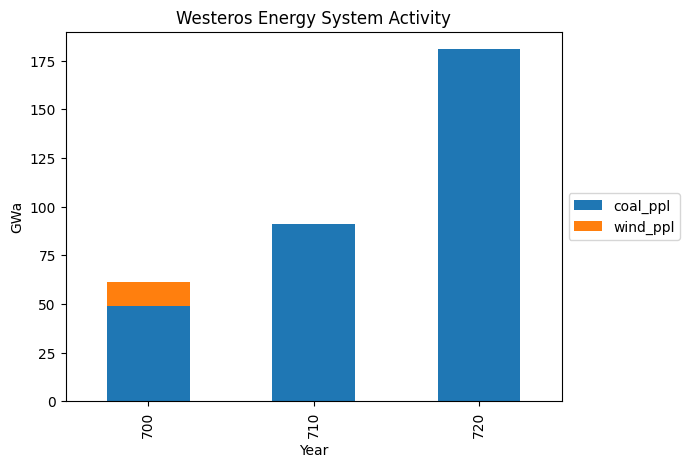

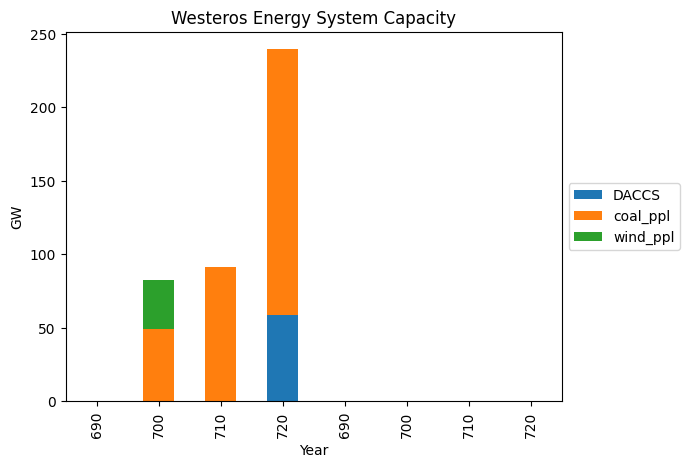

In [17]:
rep.set_filters(t=["coal_ppl", "wind_ppl","DACCS"])
rep.get("plot activity")
rep.get("plot capacity")

## Solving the Model with Technology Cost Learning
Technology cost learning module can be activated by setting `learningmode` value to 1. This can also be done by passing `"--learningmode=1"` GAMS argument in the solve statement, i.e., `gams_args =["--foresight=X","--learningmode=1"]`. It is important to note that the learning module lives under the recursive dynamic module. Hence, this module needs to be active if learning module is used.

In [18]:
model = "Westeros Electrified"

base = message_ix.Scenario(mp, model=model, scenario="emission_bound_DACCS")
scen = base.clone(
    model,
    "emission_bound_DACCS_recursive-dynamic_learning",
    "introducing recursive dynamic mode",
    keep_solution=False,
)
scen.check_out()

scen.commit(comment="Introducing recursive dynamic mode in MESSAGE")
scen.set_as_default()
scen.solve(gams_args =["--foresight=3","--learningmode=1"])
scen.var("OBJ")["lvl"]

227017.375

<Axes: title={'center': 'Westeros Energy System Capacity'}, xlabel='Year', ylabel='GW'>

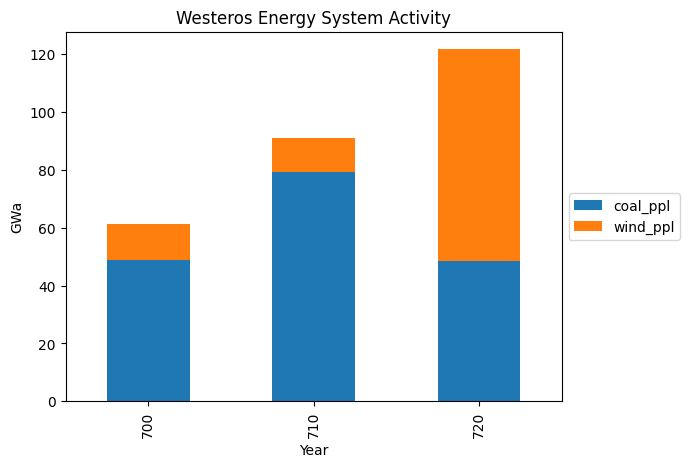

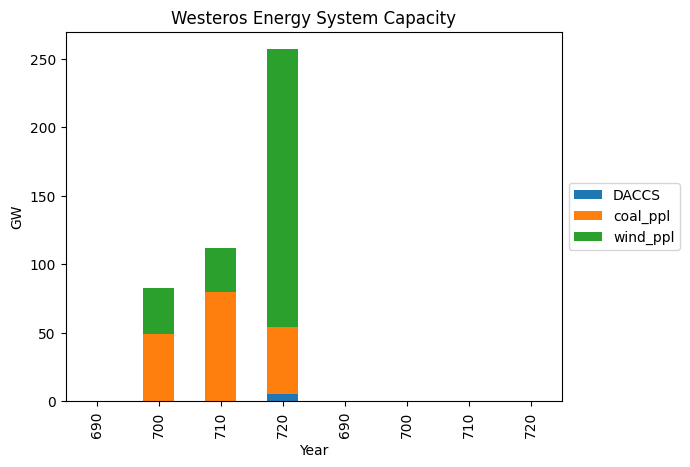

In [19]:
from message_ix.reporting import Reporter
from message_ix.util.tutorial import prepare_plots

rep = Reporter.from_scenario(scen)
prepare_plots(rep)

rep.set_filters(t=["coal_ppl", "wind_ppl","DACCS"])
rep.get("plot activity")
rep.get("plot capacity")

## Close the connection to the database

In [20]:
mp.close_db()